In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [6]:
dados_reabertura = r'C:\Users\PICHAU\Downloads\covid19-c5934922cc2447719911b68006698fb0.csv'
dados_manifestacao_sintomas = r'C:\Users\PICHAU\Downloads\covid19-4565d8c8de6a47ad93edb79fd3bb3788.csv'
ultimos_dados = r'C:\Users\PICHAU\Downloads\covid19-5ad8c95c036545f892759944b7cba35c.csv'
df1 = pd.read_csv(dados_reabertura, delimiter = ',', error_bad_lines=False)
df2 = pd.read_csv(dados_manifestacao_sintomas, delimiter = ',', error_bad_lines=False)
df3 = pd.read_csv(ultimos_dados, delimiter = ',', error_bad_lines=False)

In [7]:
dfs = pd.concat([df1,df2,df3])

In [8]:
total_casos_confirmados_periodo_reabertura = dfs['last_available_confirmed'][dfs['epidemiological_week'] == 24].sum()
total_obitos_reabertura = dfs['last_available_deaths'][dfs['epidemiological_week'] == 24].sum()
total_casos_confirmados_periodo_reabertura

1545561

In [9]:
total_casos_confirmados_periodo_manisfestacao_sintomas = dfs['last_available_confirmed'][dfs['epidemiological_week'] == 26].sum()
total_obitos_periodo_manisfestacao_sintomas = dfs['last_available_deaths'][dfs['epidemiological_week'] == 26].sum()
total_casos_confirmados_periodo_manisfestacao_sintomas

2430949

In [10]:
total_casos_confirmados_atualmente = dfs['last_available_confirmed'][dfs['epidemiological_week'] == 27].sum()
total_obitos_periodo_atualmente = dfs['last_available_deaths'][dfs['epidemiological_week'] == 27].sum()
total_obitos_periodo_atualmente

472132

In [11]:
porcentagem_crescimento_casos_confirmados = (total_casos_confirmados_periodo_manisfestacao_sintomas - total_casos_confirmados_periodo_reabertura) / total_casos_confirmados_periodo_reabertura * 100
round(porcentagem_crescimento_casos_confirmados,2)

57.29

- Taxa de crescimento em comparação de casos confirmados de covid-19 com o periodo de reabertura dos comércios e o tempo da manifestação dos sintomas
 

In [12]:
total_obitos_periodo_reabertura = dfs['last_available_deaths'][dfs['epidemiological_week'] == 24].sum()
total_obitos_periodo_atual = dfs['last_available_deaths'][dfs['epidemiological_week'] == 27].sum()
porcentagem_crescimento_obitos = (total_obitos_periodo_atual - total_obitos_periodo_reabertura) / total_obitos_periodo_reabertura * 100
round(porcentagem_crescimento_obitos,2)

494.77

- Taxa de crescimento em comparação de casos de óbitos por covid-19 com o periodo de reabertura dos comércios e o tempo da manifestação dos sintomas

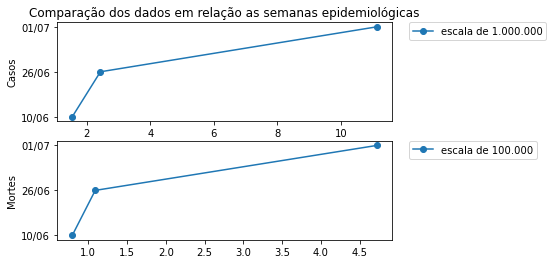

In [13]:
valores_casos = [(total_casos_confirmados_periodo_reabertura/1000000), (total_casos_confirmados_periodo_manisfestacao_sintomas/1000000),(total_casos_confirmados_atualmente/1000000)]
valores_mortes = [(total_obitos_reabertura/100000), (total_obitos_periodo_manisfestacao_sintomas/100000), (total_obitos_periodo_atualmente/100000)]
datas = ['10/06','26/06', '01/07']
plt.subplot(2,1,1)
plt.plot(valores_casos,datas,'o-', label= 'escala de 1.000.000')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Comparação dos dados em relação as semanas epidemiológicas")
plt.ylabel('Casos')
plt.subplot(2,1,2)
plt.plot(valores_mortes,datas,'o-',label = 'escala de 100.000')
plt.ylabel('Mortes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Text(0.5, 0, 'média de novos casos')

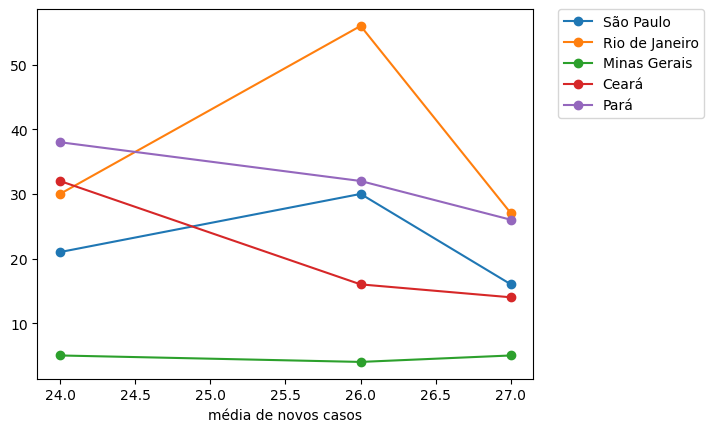

In [14]:
plt.style.use('default')
dfs[dfs['state'] == 'SP'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='São Paulo')
dfs[dfs['state'] == 'RJ'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='Rio de Janeiro')
dfs[dfs['state'] == 'MG'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='Minas Gerais')
dfs[dfs['state'] == 'CE'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='Ceará')
dfs[dfs['state'] == 'PA'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='Pará')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('média de novos casos')

- Gráfico demonstrativo de médias da evolução de novos casos de corona nos estados. 

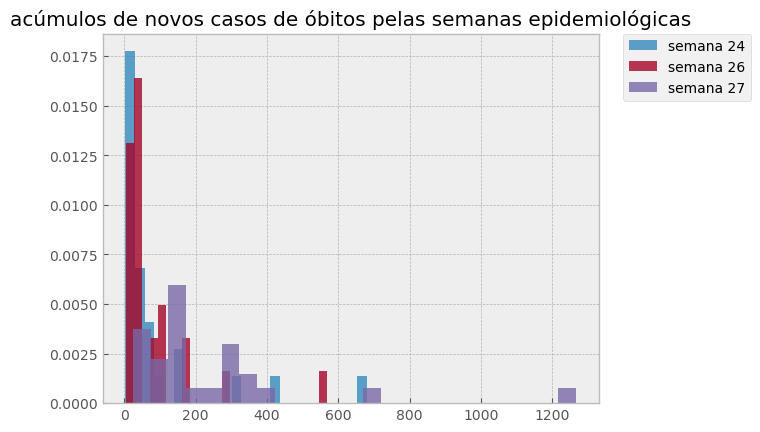

In [18]:
plt.style.use('bmh')
plt.subplots()
dfs[dfs['epidemiological_week'] == 24].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 24')
dfs[dfs['epidemiological_week'] == 26].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 26')
dfs[dfs['epidemiological_week'] == 27].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 27')
plt.title('acúmulos de novos casos de óbitos pelas semanas epidemiológicas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

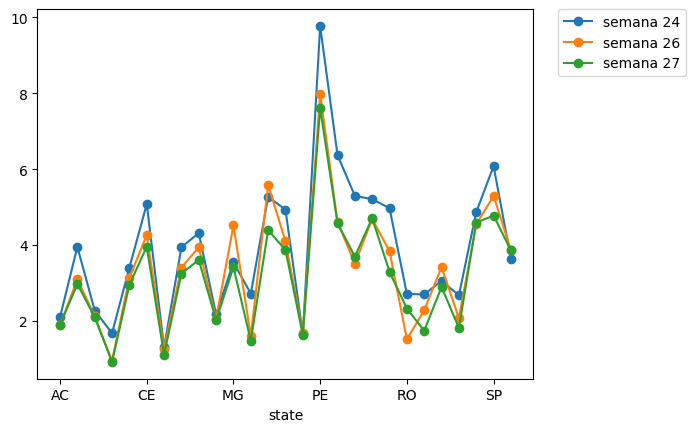

In [129]:
plt.style.use('default')
(dfs[dfs['epidemiological_week']==24].groupby('state')['last_available_death_rate'].mean()*100).plot(marker='o',label='semana 24')
(dfs[dfs['epidemiological_week']==26].groupby('state')['last_available_death_rate'].mean()*100).plot(marker='o',label='semana 26')
(dfs[dfs['epidemiological_week']==27].groupby('state')['last_available_death_rate'].mean()*100).plot(marker='o',label='semana 27')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

- Crescimendo da taxa de mortalidade entre os estados comparado as semanas epidemiológicas.

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

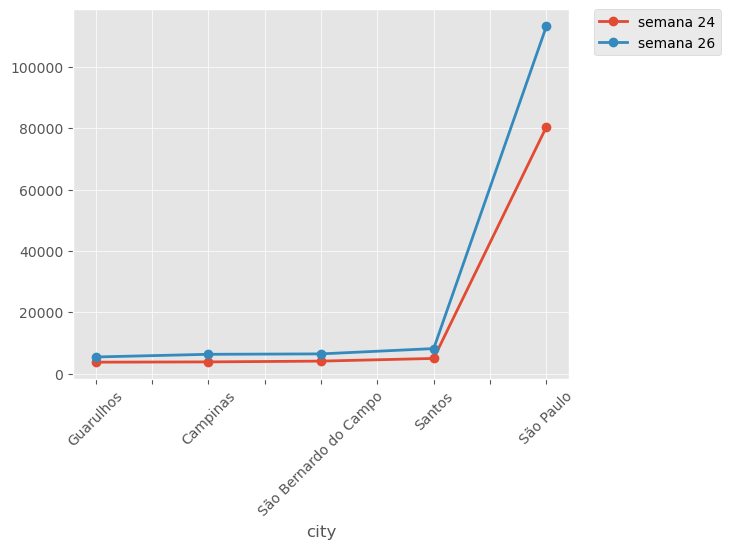

In [17]:
plt.style.use('ggplot')
dfs[(dfs['state']=='SP')&(dfs['epidemiological_week']==24)].groupby('city')['last_available_confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 24')
dfs[(dfs['state']=='SP')&(dfs['epidemiological_week']==26)].groupby('city')['last_available_confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 26')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

- Comparação das cidades com maiores casos de coronavirus do estado de São Paulo em comparação das semanas de reabertura em prazo a manifestação dos sintomas.